In [8]:
import sys
import os
PROJ_DIR = os.path.realpath(os.path.dirname(os.path.abspath('')))
sys.path.append(os.path.join(PROJ_DIR,'src'))
import xai_faithfulness_experiments_lib_edits as fl
import numpy as np

data = np.load(os.path.join(PROJ_DIR, 'results', 'imagenet_40_resnet18_randomattr_quantus_other_measures.npz'))

In [13]:
for measure in ['FaithfulnessCorrelation']:
    print('-'*20)
    print(measure)
    print('-'*20)
    print(np.vstack((data[measure],data[f'{measure}_inv'])))

--------------------
FaithfulnessCorrelation
--------------------
[[-0.28242737  0.21357302 -0.2684112  ... -0.35677516 -0.04964771
   0.30902112]
 [-0.6447639   0.829033   -0.8857317  ... -1.0618869  -0.22931123
  -0.2562611 ]]


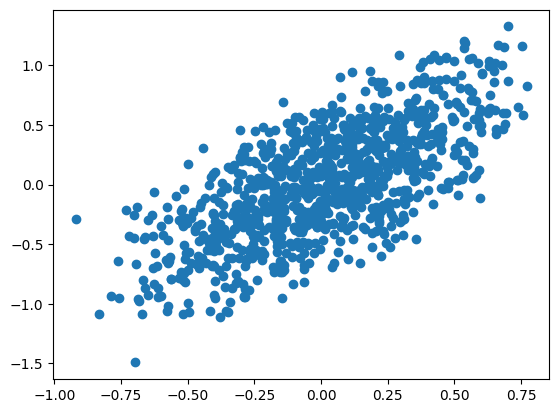

In [14]:
from matplotlib import pyplot as plt

for m in ['FaithfulnessCorrelation']:
    plt.scatter(data[m],data[f'{m}_inv'])
    plt.show()

In [15]:
def measure_correct_orderings(truths, estimators):
    '''
    Creates len(truth) x,y pairs and computes the fraction of them for which (truths[x]<truths[y] and estimators[x]<estimators[y]) or (truths[x]>truths[y] and estimators[x]>estimators[y])
    Inputs:
        - Truths & estimators contain num_elems floats
    Output:
        - Float representing the fraction of correctly ordered pairings
    '''
    xs = np.random.permutation(truths.size)
    ys = np.random.permutation(truths.size)
    truthX_lt_Y = truths[xs] < truths[ys]
    estimatorX_lt_Y = estimators[xs] < estimators[ys]
    hits = truthX_lt_Y==estimatorX_lt_Y
    return hits.sum()/truths.size

In [17]:
TARGET_MEASURE = 'FaithfulnessCorrelation'
qmeans = data[TARGET_MEASURE]
qmeans_inv = data['qmean_invs' if TARGET_MEASURE=='qmeans' else TARGET_MEASURE + '_inv']
qmean_mean = np.mean(qmeans)
qmean_std = np.std(qmeans)
z_scores = ((qmeans - qmean_mean) / qmean_std).flatten()
correct_pairings_inv = measure_correct_orderings(z_scores, qmeans_inv)#TODO Check in paper what shoud be compared
print(correct_pairings_inv)

0.736


In [18]:
qmeans_inv

array([-6.44763887e-01,  8.29033017e-01, -8.85731697e-01,  2.28766814e-01,
       -8.97463933e-02,  6.14026845e-01, -4.75341827e-01,  3.03770956e-02,
       -5.69344401e-01, -3.67803752e-01,  5.74442483e-02,  3.90354469e-02,
       -1.77505314e-01, -9.34923650e-04, -9.74117294e-02,  4.44565833e-01,
       -1.43561736e-02, -6.58509672e-01,  1.10191122e-01,  4.88451540e-01,
       -9.24081683e-01, -1.85711220e-01, -3.55981857e-01,  1.45548776e-01,
        3.60085547e-01,  2.58008003e-01,  9.92160961e-02, -2.82487214e-01,
       -4.18183059e-01, -4.83690262e-01, -1.24199532e-01,  8.70774329e-01,
        3.74361843e-01, -2.30200455e-01, -3.20867658e-01,  9.67059061e-02,
       -4.13183898e-01, -7.86102235e-01, -4.31616694e-01, -6.80031896e-01,
       -7.07637608e-01, -4.99276578e-01,  1.30673543e-01, -3.56133252e-01,
        1.08390987e+00, -3.36460531e-01, -2.48100474e-01,  5.55049717e-01,
       -3.04372281e-01, -5.57217717e-01, -8.31689119e-01, -6.45385563e-01,
       -1.03417389e-01, -